In [215]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [216]:
# Reading Data
companies = pd.read_csv('1000_companies.csv')
# Collecting X and Y
x = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


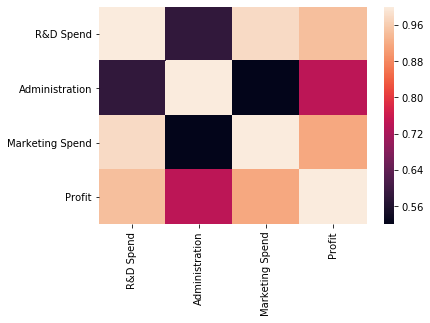

In [217]:
# Data Visualisation
# Building the Correlation Matrix

sns.heatmap(companies.corr())


In [218]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

label_encoder_x_1 = LabelEncoder()
x[: , 3] = label_encoder_x_1.fit_transform(x[:,3])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
x = transformer.fit_transform(x.tolist())
x = x.astype('float64')
print(x[0])

  (0, 979)	1.0
  (0, 998)	165349.2
  (0, 999)	471784.1
  (0, 1000)	2.0


In [219]:
x = x[:, 1:]

In [220]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [221]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
# Predicting the Test set results
y_pred = lin_reg.predict(x_test)
y_pred

array([ 90111.80903982,  88739.78308874,  95247.62424785, 176584.16307575,
        82719.29099942, 110048.42467902, 107386.27069491,  91805.03930677,
       164409.66439065,  53364.31691619,  67129.29502371, 151313.50005101,
       127467.35263653,  59469.60828849, 178380.82669401,  74573.48053202,
       118794.15366121, 165360.82711124, 153304.12694116, 181990.4198435 ,
       102784.46485944,  85965.51034674, 181928.93377731,  84431.1553337 ,
       105421.68453424, 101625.9475384 ,  50265.94917403,  56023.93142307,
        69087.60519337, 188872.76962235, 121340.47495247, 112182.51726291,
       100907.91698161, 138627.65656978,  64130.52464499, 109297.72260756,
       185960.57423646, 172319.57139674, 175541.11250915, 118213.91361021,
        96121.8000183 , 166244.13897341, 108157.10191528,  50317.19319969,
       117049.11624764,  58759.85036972, 159212.36311642,  78840.48162462,
       160531.71847036, 131764.07299838, 185841.23685407, 175505.71095823,
        94091.46140839,  

In [223]:
# Calculating the Coefficients
print(lin_reg.coef_)

[-1.42005953e+04  1.72838242e+04 -1.34150344e+03  5.69488586e+03
  9.67937222e+03 -4.92486970e+03  7.37082012e+03  2.06961915e+03
 -7.53104884e+03  0.00000000e+00  0.00000000e+00  7.77013805e+02
  3.66782351e+03 -6.47044190e+03  8.53637897e+03  1.00539247e+03
  1.00488889e+03  1.00148507e+03  0.00000000e+00 -6.69869506e+02
 -6.69972092e+02  9.92448625e+02  1.59643600e+02  1.59531697e+02
  9.91711909e+02 -6.73599719e+02  9.87916418e+02  0.00000000e+00
 -6.79903790e+02  9.83393527e+02  9.81873461e+02  1.48723400e+02
 -6.84398700e+02 -6.86105264e+02  0.00000000e+00 -6.88837648e+02
  9.71475488e+02  9.70953261e+02  9.69097476e+02  0.00000000e+00
 -6.98853278e+02  1.29251675e+02  0.00000000e+00  1.27666331e+02
  9.59827899e+02  9.59221730e+02  9.52320838e+02  1.19301324e+02
  9.51677371e+02  1.17995747e+02  1.16858034e+02  9.49103524e+02
  9.44776479e+02  9.44580643e+02  9.43163163e+02  0.00000000e+00
 -7.26027900e+02  0.00000000e+00 -7.32975416e+02 -7.33115300e+02
  9.32056445e+02 -7.33814

In [224]:
# Calculating the Intercept
print(lin_reg.intercept_)

51078.241069199095


In [225]:
# Calculating the R-squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8360878212324576